# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링(Level 2)

## **Mission 1. 탐색적 데이터 분석**

### **[미션 이해하기]**
* 여러분들은 파인애플 보험사의 직원입니다. 파인애플 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요? 
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


#### <b>[1일차] mission 1 목표 <b>: 고객의 기본 정보, 행동 정보 등을 확인해서 주요 변수를 선정하고 데이터 탐색해보기

#### <b>[실습프로세스]<b>

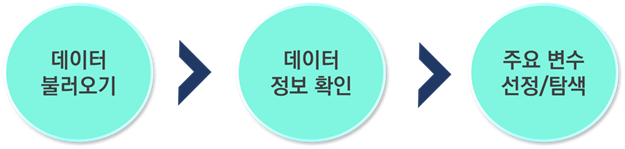

---------------------------------------------------------------------------------------------
## **(1) 데이터 불러오기**

* numpy, pandas, matplotlib, seaborn 등 데이터 분석에 필요한 라이브러리를 로딩해 봅시다.
* 만약 라이브러리가 없을 때 !pip를 통해 라이브러리를 설치해 주세요. (ex. !pip install pandas)
* 현위치에서 'customers_seg.csv' 파일을 읽어와 주세요.
* 활용하지 않는 변수를 index 화 해주세요. 

In [1]:
# [같이 하기] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 를 임포트 하기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# 시각화 표에서 에러나는 부분 글꼴 셋팅

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [3]:
# [같이 하기] 데이터 불러오기
# 1. data 변수에 'customers_seg.csv' 파일을 불러와서 할당, 인코딩은 cp949로 하기
# 2. data 변수 호출해서 상위 5개 행 확인해보기

data = pd.read_csv('customers_seg.csv', encoding= 'cp949')
data.head(5)

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [4]:
# [같이 하기] Index화 시키기
# 1. 해당 data 셋에서 'CID'는 활용하지 않을 예정으로 index 화 시켜보자.(함수: set_index 활용)
# 2. 잘 바뀌었는지 data 변수 호출해서 상위 5개 행 확인해보기
data = data.set_index('CID')
data.head(5)

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
CID,,,,,,,,,,,,,,,,,,,,
1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


---------------------------------------------------------------------------------------------
## **(2) 데이터 기초 정보 확인하기**
* 불러온 데이터셋(data)의 기초 정보들을 확인해봅시다.

In [5]:
# [문제1] 데이터 셋의 상위 5개 행을 확인해보자.
data.head(5)


,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
CID,,,,,,,,,,,,,,,,,,,,
1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [6]:
# [문제2] 데이터 셋의 하위 5개 행을 확인해보자.
data.tail(5)

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
CID,,,,,,,,,,,,,,,,,,,,
11996,1,계약자,고용,1,25.9851,0,기본,대학졸업,86451000,도심,기혼,70,0,2,비방문,설계사독려,인터넷,245000,일반세단,중
11997,3,피보험자,고용,0,3.4410,1,중급,대학졸업,25962000,도시근교,미혼,80,0,1,자주방문,할인,자사영업,468000,일반세단,중
11998,3,피보험자,무직,1,9.0576,0,중급,대학졸업,0,도시근교,미혼,90,3,2,자주방문,할인,자사영업,977000,일반세단,중
11999,4,계약자,고용,1,8.3472,0,중급,대학졸업,26366000,도시근교,기혼,100,0,3,비방문,포인트,자사영업,854000,일반세단,대
12000,3,피보험자,무직,1,2.8971,0,중급,대학졸업,0,도시근교,미혼,80,0,1,자주방문,없음,콜센터,456000,컴팩트카,중


In [7]:
# [문제3] data 데이터프레임의 행, 열의 개수 확인해보자.(shape)
data.shape


(12000, 20)

In [8]:
#[문제4] data 데이터프레임의 컬럼명, 데이터 개수, 데이터 타입 정보를 확인 해보자.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   등록(계/피)                  12000 non-null  object 
 2   고용상태                     12000 non-null  object 
 3   성별                       12000 non-null  int64  
 4   Willingness to pay/Stay  12000 non-null  float64
 5   갱신                       12000 non-null  int64  
 6   상품타입                     12000 non-null  object 
 7   교육수준                     12000 non-null  object 
 8   소득                       12000 non-null  int64  
 9   지역                       12000 non-null  object 
 10  결혼여부                     12000 non-null  object 
 11  월 납입액                    12000 non-null  int64  
 12  VOC                      12000 non-null  int64  
 13  타 상품 보유 현황               12000 non-null  object 
 14  온라인방문빈도               

In [9]:
# [문제5] 데이터 셋 수치형 데이터 기초통계 정보를 확인해보자
data.describe()


,AGE,성별,Willingness to pay/Stay,갱신,소득,월 납입액,VOC,총지불금액
count,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,1.200000e+04
mean,3.079000,0.487583,8.859478,0.143000,4.641737e+07,100.065833,0.390167,5.355854e+05
std,1.121768,0.499867,7.698885,0.350087,3.736221e+07,42.453750,0.919605,3.587993e+05
min,1.000000,0.000000,2.045730,0.000000,0.000000e+00,60.000000,0.000000,0.000000e+00
25%,3.000000,0.000000,4.373400,0.000000,0.000000e+00,70.000000,0.000000,3.360000e+05
50%,3.000000,0.000000,6.384831,0.000000,4.186240e+07,90.000000,0.000000,4.740000e+05
75%,4.000000,1.000000,9.867900,0.000000,7.664150e+07,120.000000,0.000000,6.790000e+05
max,6.000000,1.000000,92.496300,1.000000,1.320209e+08,350.000000,5.000000,3.573000e+06


In [10]:
# [문제6] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.
data.columns


Index(['AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신', '상품타입',
       '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황', '온라인방문빈도',
       '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

---------------------------------------------------------------------------------------------
## **(3) 주요 변수 선정 및 탐색**

#### <b> 21개의 features 값은 어떤 의미일지 알아보고 주요 변수를 선정해 봅시다!
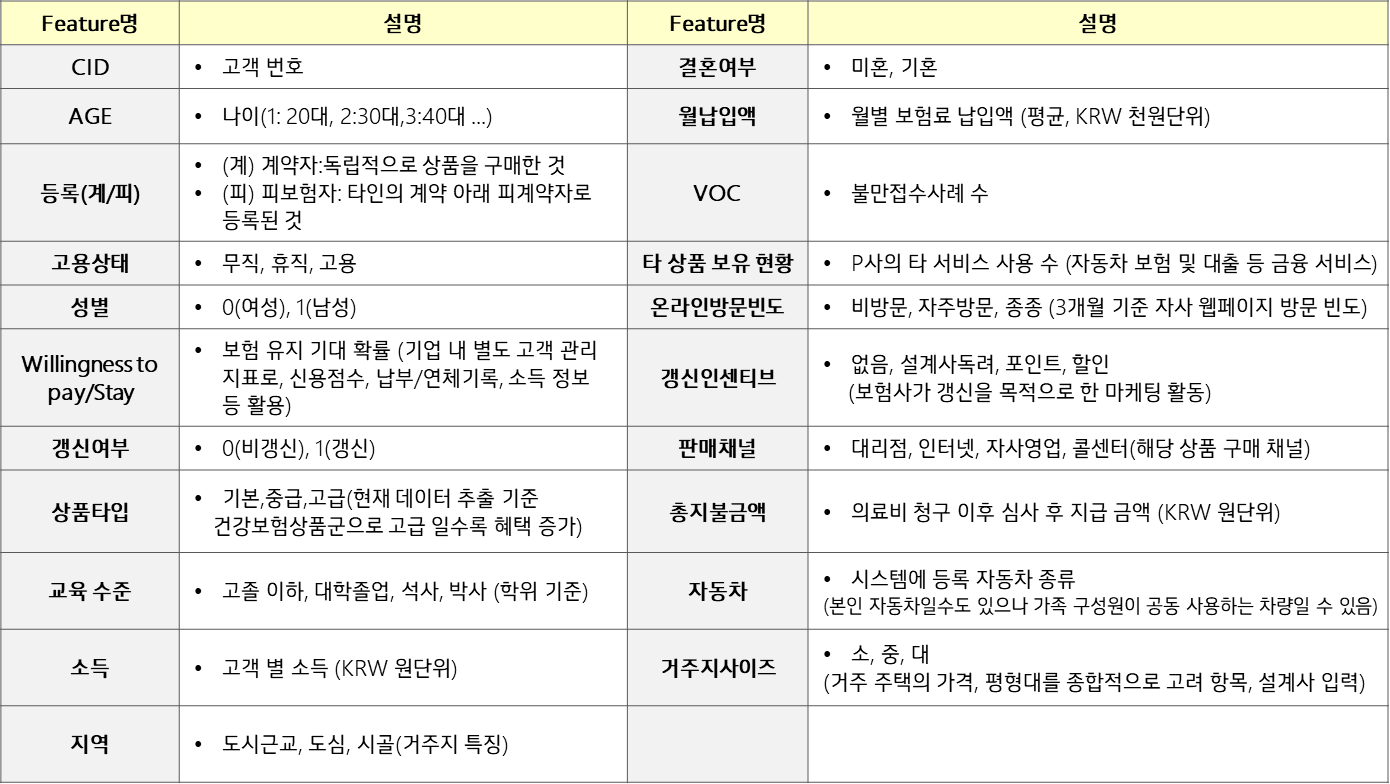

---------------------------------------------------------------------------------------------
### *<b>이 중 주요 변수를 선정 해 보았을 때 <font color="1E90FF"><b>11개의 features를 선정하였다.</font>
#### <font color="1E90FF"><b>* 우리의 목표: 군집화가 된 고객 segment 개발</font>
   
<span><b>1. 도메인 내 주요 정보 항목</span>
    <br><br>
        - (1) Willingness to pay/Stay: 계속 보험을 유지할 지 판단하는 지표 (신용점수, 납부/연체기록, 소득 등 활용)
    <br>- (2) 소득 
    <br>- (3) 월 납입액
    <br>- (4) 타상품 보유 현황: 고객이 이용하는 파인애플사의 타 서비스 수(어느정도 고객의 충성도를 알 수 있음)
    <br>- (5) 총지불금액
    
<span><b>2. 분석가 선정 컬럼</span>
    <br><br>- (6)AGE, (7)고용상태, (8)교육수준: 고객 기본 정보
    <br>- (9)상품타입, (10)거주지사이즈, (11)자동차: 소득 등과 연관해서 추정이 가능한 정보

### <b> [분석가 선정 컬럼 탐색하기]
* 분석가 선정 컬럼 : AGE, 고용상태, 교육수준, 상품 타입, 거주지사이즈, 자동차(총 6개 피쳐)
* 위 분석가 선정 컬럼을 crosstab을 통해서 탐색해 보자!

In [11]:
#[문제 7] 분석가 선정 컬럼들이 수치형인지 문자/범주형인지 알아보자! (info 활용)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   등록(계/피)                  12000 non-null  object 
 2   고용상태                     12000 non-null  object 
 3   성별                       12000 non-null  int64  
 4   Willingness to pay/Stay  12000 non-null  float64
 5   갱신                       12000 non-null  int64  
 6   상품타입                     12000 non-null  object 
 7   교육수준                     12000 non-null  object 
 8   소득                       12000 non-null  int64  
 9   지역                       12000 non-null  object 
 10  결혼여부                     12000 non-null  object 
 11  월 납입액                    12000 non-null  int64  
 12  VOC                      12000 non-null  int64  
 13  타 상품 보유 현황               12000 non-null  object 
 14  온라인방문빈도               

### **【각각의 변수들이 어떤 의미를 가지고 있을지 데이터 탐색을 해보자!】**

<b>1. AGE

In [27]:
#[같이 하기] age 변수에 대해 교차표를 생성하고 탐색해보자.
#  age는 수치형이나 연령대(20대, 30대...)이므로 교차표(crosstab) 생성해보자.
#  crosstab의 파라미터(data[],columns='percentage',normalize= ) 하고 비율로 바꿔보자.
#  (1: 20대, 2: 30대, 3: 40대, 4: 50대, 5: 60대, 6: 70대)

age_ct = pd.crosstab(data['AGE'], columns='percentage', normalize=True)*100
age_ct

col_0,percentage
AGE,
1,12.116667
2,12.816667
3,39.791667
4,26.033333
5,8.808333
6,0.433333


<b>**age 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**
## ↓ 

In [ ]:
# 3-40대 고객층이 가장 많다
# 60대 이상의 보험가입자는 극히 드물다

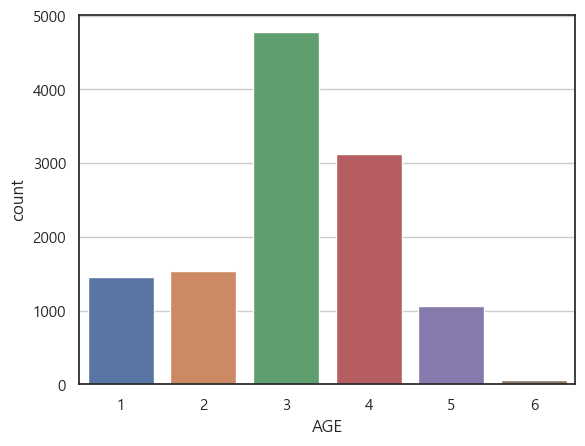

In [33]:
#[같이 하기] age에 대해 countplot 으로 시각화를 해보자!
# 1. sns.countplot(x=' ', data= )으로 시각화. 색상은 원하는 색상으로!
# 2. title=('age'), grid 도 넣어서 이쁘게 만들어보자.

sns.countplot(x='AGE', data=data)
plt.grid(axis='y')
plt.show()

<b>2. 고용상태

In [24]:
#[문제 8] '고용상태' 변수에 대해 교차표를 생성하고 탐색해보자.(함수: crosstab(),colums='count')
hire_ct = pd.crosstab(data['고용상태'], columns='count')
hire_ct

col_0,count
고용상태,
FALSE,360
고용,7518
무직,3028
휴직,1094


In [26]:
#[문제 9] 생성한 교차표를 비율로 만들어서 탐색해보자.
# Normalize=True(표준화) 하고 * 100을 곱해주어 비율을 확인 해보자.
hire_ct = pd.crosstab(data['고용상태'], columns='percentage', normalize=True)*100
hire_ct

col_0,percentage
고용상태,
FALSE,3.000000
고용,62.650000
무직,25.233333
휴직,9.116667


In [30]:
#[문제 10] 결측치 같아 보이는 것을 확인 해보자.
# 어라.. FALSE 값이 있잖어? 이게 뭐여...결측치가 있네?....info 값에서는 결측치가 안보였는데...?
# 고용상태의 결측치가 있는지 다시 확인해 보자.(isnull().any() 활용)
data['고용상태'].isnull().any()


False

<b>**'고용상태' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**
## ↓ 

In [ ]:
# 고용상태인 고객들이 가장 많다
# 휴직자의 경우 표본 자체가 작기 때문에 비율 또한 작다

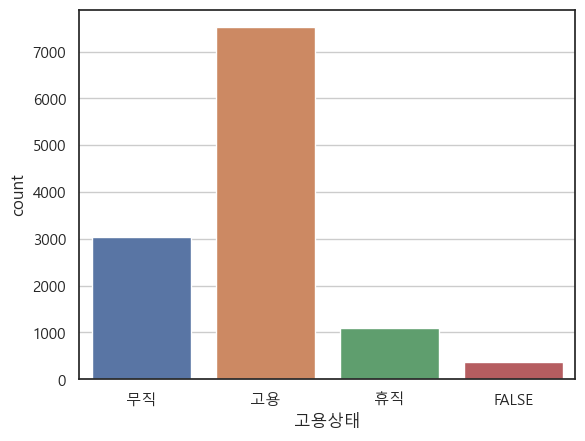

In [32]:
#[문제 11] '고용상태'에 대해 countplot 으로 시각화를 해보자!
sns.countplot(x='고용상태', data=data)
plt.grid(axis='y')
plt.show()

<b>3. 교육수준

In [34]:
#[문제 12] '교육수준' 변수에 대해 교차표를 생성하고 탐색해보자.(함수: crosstab(),colums='count')
edu_ct = pd.crosstab(data['교육수준'], columns='count')
edu_ct

col_0,count
교육수준,
고졸이하,3477
대학졸업,7105
박사,439
석사,979


In [35]:
#[문제 13] 교육수준별 생성한 교차표를 비율로 만들어서 탐색해보자.
# Normalize=True(표준화) 하고 * 100을 곱해주어 비율을 확인 해보자.
edu_ct = pd.crosstab(data['교육수준'], columns='percentage', normalize=True)*100
edu_ct

col_0,percentage
교육수준,
고졸이하,28.975000
대학졸업,59.208333
박사,3.658333
석사,8.158333


<b>**'교육수준' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**
## ↓ 

In [ ]:
# 대학 졸업의 고객수 비중이 가장 높다
# 일반적인 학력 비율과 유사해보인다

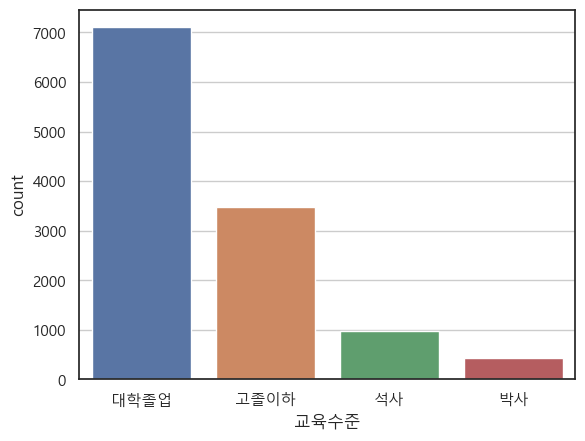

In [36]:
#[문제 14] '교육수준'에 대해 countplot 으로 시각화를 해보자!
sns.countplot(x='교육수준', data=data)
plt.grid(axis='y')
plt.show()

<b>4. 상품타입

In [37]:
#[문제 15] '상품타입'변수에 대해 교차표를 생성하고 탐색해보자.(함수: crosstab(),colums='percentage')
# Normalize=True(표준화) 하고 * 100을 곱해주어 비율을 확인 해보자.
type_ct = pd.crosstab(data['상품타입'], columns='percentage', normalize=True)*100
type_ct

col_0,percentage
상품타입,
고급,8.958333
기본,60.650000
중급,30.391667


<b>**'상품타입' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**
## ↓ 

In [ ]:
# 기본형의 가입 비중이 가장 높다
# 고급형까지는 필요 없다고 생각하는 고객이 많아보인다

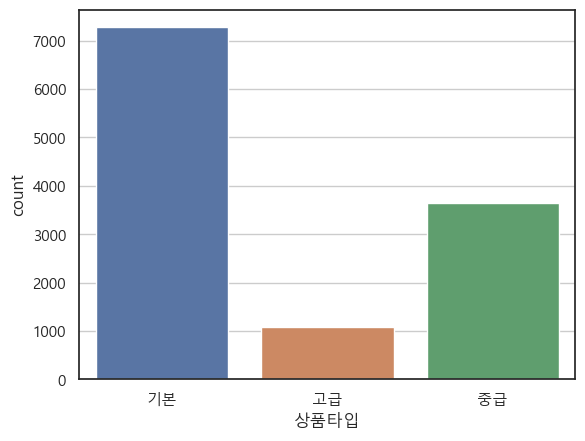

In [38]:
#[문제 16] '상품타입'에 대해 countplot 으로 시각화를 해보자!
sns.countplot(x='상품타입', data=data)
plt.grid(axis='y')
plt.show()

<b>5. 거주지사이즈

In [39]:
#[문제 17]'거주지사이즈'변수에 대해 교차표를 생성하고 탐색해보자.(함수: crosstab(),colums='percentage')
# Normalize=True(표준화) 하고 * 100을 곱해주어 비율을 확인 해보자.
reg_ct = pd.crosstab(data['거주지사이즈'], columns='percentage', normalize=True)*100
reg_ct

col_0,percentage
거주지사이즈,
대,10.375000
소,19.433333
중,70.191667


<b>**'거주지사이즈' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**
## ↓ 

In [ ]:
# 중간사이즈의 거주지를 가진 고객이 가장 많다
# 대한민국의 기본적인 구성 비율과 비슷해 보인다

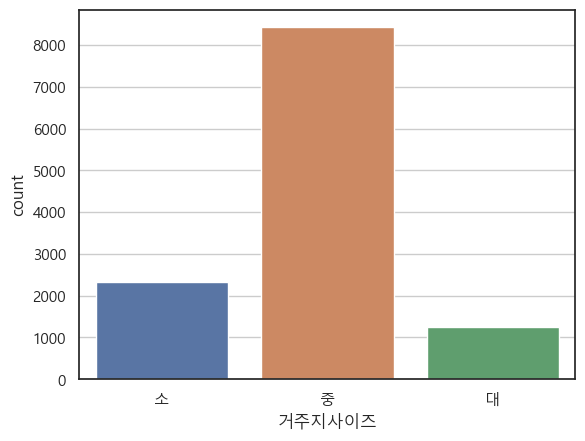

In [40]:
#[문제 18] '거주지사이즈'에 대해 countplot 으로 시각화를 해보자!
sns.countplot(x='거주지사이즈', data=data)
plt.grid(axis='y')
plt.show()

<b>6. 자동차

In [41]:
#[문제 19]'자동차'변수에 대해 교차표를 생성하고 탐색해보자.(함수: crosstab(),colums='percentage')
# Normalize=True(표준화) 하고 * 100을 곱해주어 비율을 확인 해보자.
hire_ct = pd.crosstab(data['자동차'], columns='percentage', normalize=True)*100
hire_ct

col_0,percentage
자동차,
SUV,19.466667
고급차,3.783333
스포츠카,5.433333
일반세단,50.616667
컴팩트카,20.700000


<b>**'자동차' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**
## ↓ 

In [ ]:
# 일반 세단을 보유한 고객이 가장 많다
# 대한민국의 기본적인 구성 비율과 비슷해 보인다

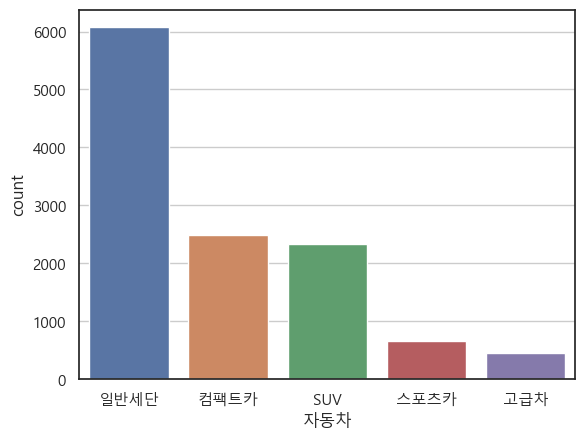

In [42]:
#[문제 20]'자동차'에 대해 countplot 으로 시각화를 해보자!
sns.countplot(x='자동차', data=data)
plt.grid(axis='y')
plt.show()

### **<b>[도메인 주요 항목 컬럼 탐색하기]**
* 도메인 주요 항목 : Willingness to pay/Stay,소득,월 납입액,타상품 보유 현황,총지불금액(총 5개 항목)
* 위 도메인 주요 항목 컬럼을 crosstab, histplot 을 통해서 탐색해 보자

In [43]:
#[문제 21] 도메인 내 주요 항목 컬럼들이 수치형인지 문자형인지 알아보자! (info 활용)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   등록(계/피)                  12000 non-null  object 
 2   고용상태                     12000 non-null  object 
 3   성별                       12000 non-null  int64  
 4   Willingness to pay/Stay  12000 non-null  float64
 5   갱신                       12000 non-null  int64  
 6   상품타입                     12000 non-null  object 
 7   교육수준                     12000 non-null  object 
 8   소득                       12000 non-null  int64  
 9   지역                       12000 non-null  object 
 10  결혼여부                     12000 non-null  object 
 11  월 납입액                    12000 non-null  int64  
 12  VOC                      12000 non-null  int64  
 13  타 상품 보유 현황               12000 non-null  object 
 14  온라인방문빈도               

<b> 1. WTP(Willingness to pay/Stay)
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기


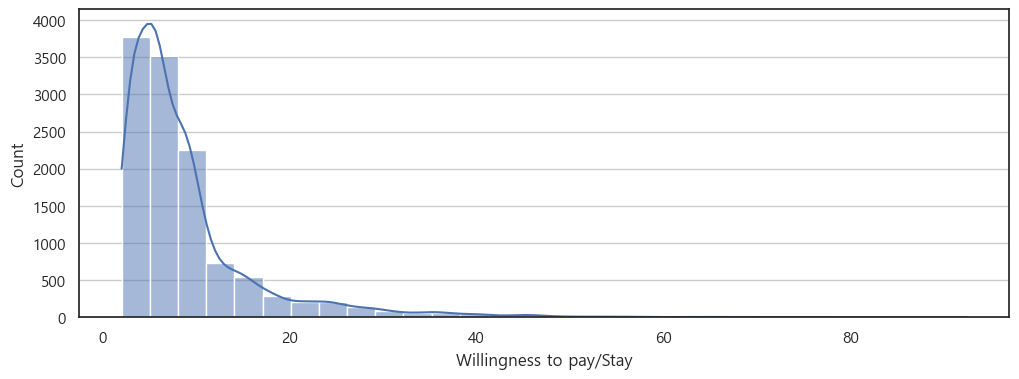

In [53]:
#[같이 하기] 히스토그램으로 'Willingness to pay/Stay(WTP)'에 대한 그래프를 그려보자.

# 1. figsize(12,8) 셋팅하기
plt.figure(figsize=(12,4))


# 2. histplot 그리기
# bins = 30, kde = True로 설정해서 그래프를 그려보자.
sns.histplot(data=data, x='Willingness to pay/Stay', bins=30, kde=True)
plt.grid(axis='y')
plt.show()

In [46]:
#[같이 하기] WTP의 평균값을 확인해보자(describe 사용)
data['Willingness to pay/Stay'].describe()


count    12000.000000
mean         8.859478
std          7.698885
min          2.045730
25%          4.373400
50%          6.384831
75%          9.867900
max         92.496300
Name: Willingness to pay/Stay, dtype: float64

<b>**'Willingness to pay/Stay(WTP)' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**
## ↓ 

In [ ]:
# 보험 유지 기대 확률이 전체적으로 낮다
# 보험 유지를 위한 적극적인 대책이 필요하다

<b> 2. 소득
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

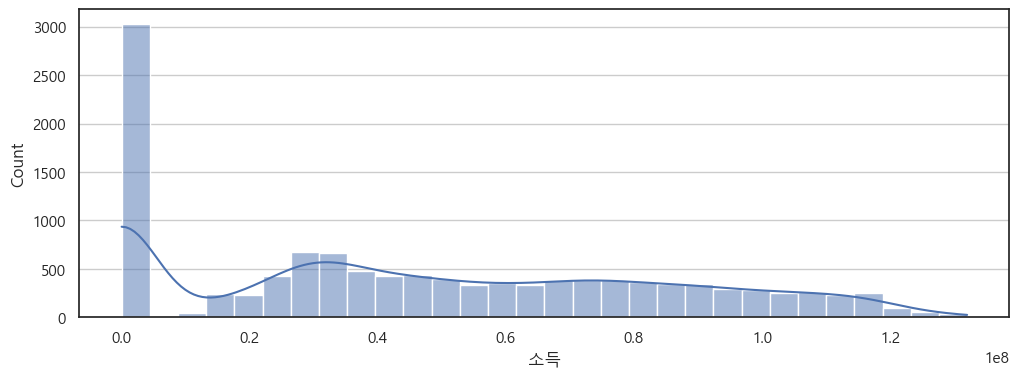

In [54]:
#[문제 22] 히스토그램으로 '소득'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자

# 1. figsize(12,8) 셋팅하기
plt.figure(figsize=(12,4))


# 2. histplot 그리기
# bins = 30, kde = True로 설정해서 그래프를 그려보자.
sns.histplot(data=data, x='소득', bins=30, kde=True)
plt.grid(axis='y')
plt.show()

<b>**'소득' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**
## ↓ 

In [ ]:
# 전체적으로 소득은 고르게 분포한다
# 소득이 없는 고객들은 무직일 가능성이 높다

<b> 3. 월 납입액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

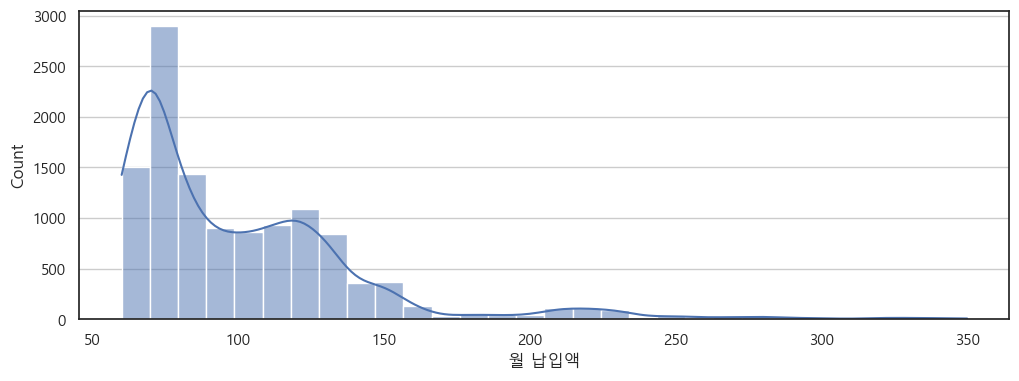

In [55]:
#[문제 23] 히스토그램으로 '월 납입액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자

# 1. figsize(12,8) 셋팅하기
plt.figure(figsize=(12,4))


# 2. histplot 그리기
# bins = 30, kde = True로 설정해서 그래프를 그려보자.
sns.histplot(data=data, x='월 납입액', bins=30, kde=True)
plt.grid(axis='y')
plt.show()

In [49]:
#[문제 24] '월 납입액'의 평균값을 확인해보자(describe 사용)
data['월 납입액'].describe()

count    12000.000000
mean       100.065833
std         42.453750
min         60.000000
25%         70.000000
50%         90.000000
75%        120.000000
max        350.000000
Name: 월 납입액, dtype: float64

<b>**'월 납입액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**
## ↓ 

In [ ]:
# 기본형 상품의 가입자가 많아 월 납입액이 적은 고객들이 많다
# 50~100만원 대의 가입자가 많다

<b> 4. 타상품 보유
* 문자형/범주형 컬럼이기 때문에 crosstab으로 데이터 확인해보기

In [51]:
#[문제 25] '타상품 보유' 변수에 대해 교차표를 생성하고 탐색해보자.(함수: crosstab(),colums='percentage')
# Normalize=True(표준화) 하고 * 100을 곱해주어 비율을 확인 해보자.
other_ct = pd.crosstab(data['타 상품 보유 현황'], columns='percentage', normalize=True)*100
other_ct

col_0,percentage
타 상품 보유 현황,
1,35.691667
2,25.141667
3,12.875000
4이상,26.291667


<b>**'타상품 보유' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**
## ↓ 

In [ ]:
# 타 상품을 보유하고 있는 고객들이 많다
# 패키지 형태로 상품을 제공하는 방안을 고려해봐야한다

<b> 5. 총지불금액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

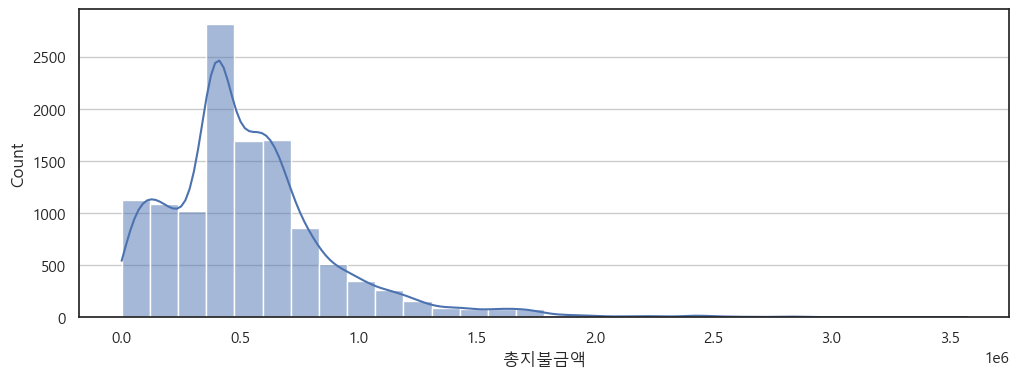

In [52]:
#[문제 26] 히스토그램으로 '총지불금액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자

# 1. figsize(12,8) 셋팅하기
plt.figure(figsize=(12,4))


# 2. histplot 그리기
# bins = 30, kde = True로 설정해서 그래프를 그려보자.
sns.histplot(data=data, x='총지불금액', bins=30, kde=True)
plt.grid(axis='y')
plt.show()

In [56]:
#[문제 27] '총지불금액'의 평균값을 확인해보자(describe 사용)
data['총지불금액'].describe()

count    1.200000e+04
mean     5.355854e+05
std      3.587993e+05
min      0.000000e+00
25%      3.360000e+05
50%      4.740000e+05
75%      6.790000e+05
max      3.573000e+06
Name: 총지불금액, dtype: float64

<b>**'총 지불 금액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**
## ↓ 

In [37]:
# 총 지불 금액이 대체적으로 낮게 형성되어 있다
# 고액을 지불한 고객에 대한 추가 정보를 살펴봐야한다

## **[Mission 1-변수 탐색 결론]**

* 수치형 컬럼 이외에도, 주요 변수 중 object 형태의 컬럼이 존재
* 수치형 컬럼은 단위가 각각 다르므로 스케일링 고려 필요
* 범주형 컬럼은 인코딩을 통해서 모델링을 위한 변환이 필요 

### <font color="1E90FF"><b>→ 데이터를 확인하고 탐색하여 전처리의 방향성 및 feature 값에 대한 이해 증대<b><br>
    

# <b>Mission 1 완료!
수고하셨습니다!